<a href="https://colab.research.google.com/github/pabloochocobar/CE888/blob/main/Labs/Lab6/Lab6_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 7 lab6


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df_country = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")
df_dictionary = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv")

In [ ]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


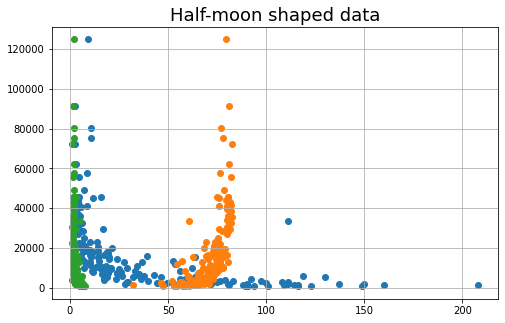

In [ ]:
#plotting income vs child mortality
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
#income vs
plt.scatter(df_country.iloc[:,1],df_country.iloc[:,5])   #  child mortality
#plt.scatter(df_country.iloc[:,7],df_country.iloc[:,5])   # life expectancy
plt.scatter(df_country.iloc[:,8],df_country.iloc[:,5])   # children
plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

In [ ]:
X = df_country.iloc[:,1:]
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,dbs_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,-1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,-1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,-1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,-1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,-1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,-1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,-1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,-1


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scalar= StandardScaler()
X_train_std = standard_scalar.fit_transform(X)
X_train_std

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -0.67917961,
         1.33085651, -0.17568209],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.48562324,
        -0.09384245, -0.17568209],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.46537561,
        -0.09384245, -0.17568209],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.63775406,
        -0.09384245, -0.17568209],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.63775406,
         1.33085651, -0.17568209],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -0.62954556,
         1.33085651, -0.17568209]])

In [ ]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X)
X_train_pca

array([[-1.98151280e+04, -1.65112472e+03,  3.84281549e+01, ...,
         3.31460081e+00, -1.55896043e-01, -1.22509612e+00],
       [-1.13389390e+04,  1.49346903e+03, -2.81853690e+01, ...,
        -3.26310975e+00, -7.97051196e-01,  6.23949221e-01],
       [-8.92635259e+03,  3.26468410e+03, -1.19198523e+01, ...,
        -4.06888838e+00, -1.03495556e+00, -1.21637015e-01],
       ...,
       [-1.72020172e+04, -2.22889873e+02, -4.52475802e+01, ...,
        -1.67744678e+00,  7.51099309e-01,  6.05261468e-01],
       [-1.72093402e+04, -2.29815899e+02,  7.96299887e+00, ...,
        -6.85257923e-01, -6.70116190e-01, -9.75725990e-01],
       [-1.79784217e+04, -1.16312463e+03,  3.22068115e+01, ...,
         1.02285764e+01,  9.24708132e-01, -9.05490168e-01]])

In [ ]:
from sklearn import cluster, datasets, metrics
km=cluster.KMeans(n_clusters=3)
km.fit(X)
label = km.labels_
label
# as we can see countries are divided into three categories so as label contain 0,1,2 all values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df_country['labels']=list(label)


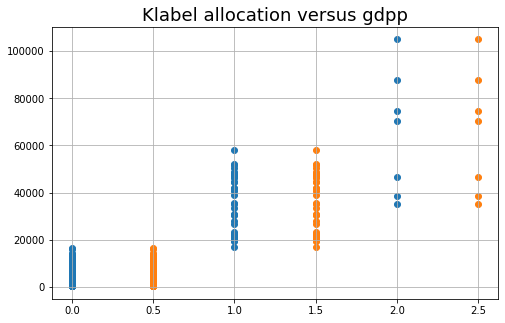

In [ ]:
#plotting gdpp vs label for k means
# As shown earlier income is the criteria for overall development with high income families have great facilities and education which interns reduce child mortality,good helth and high life expectancy
plt.figure(figsize=(8,5))
plt.title("Klabel allocation versus gdpp", fontsize=18)
plt.grid(True)
plt.scatter(df_country.iloc[:,10],df_country.iloc[:,9]) # gdpp labeled
plt.scatter(df_country.iloc[:,10]+0.5,df_country.iloc[:,9]) # income labelled I have added 0.5 so that we can distincly see blue gdpp and orange income
plt.savefig('Klabel allocation versus gdpp.png', dpi=300)
plt.show()
# as can be seen from the graph countries with higher gdpp and higher income are in 1 so 1 is developed country
#countries with slightly lower gdpp and income are in 2 so 2 is developing countries(under development) and countries labeled as 0 are undeveloped countries

In [ ]:
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(X_train_pca)
dbs.labels_ 
label2=dbs.labels_ 
label2
#we cannot seperate get seperate categories using dbs scan so dbs failed to seperate countries into three categories according to our assumptions

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
df_country[df_country['labels']==1] # thise are developing or unnder developed countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,1


In [ ]:
(df_country[df_country['labels']==1]).sort_values(by=['gdpp'],ascending = False) 

# developing countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,1


In [ ]:
df_country[df_country['labels']==2]# this are countries developed countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,2


In [ ]:
(df_country[df_country['labels']==2]).sort_values(by=['gdpp'],ascending = False) 

# developed countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,2
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2


In [ ]:
(df_country[df_country['labels']==0]).sort_values(by=['gdpp']) 
#undeveloped countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela,17.1,28.50,4.91,17.6,16500,45.900,75.4,2.47,13500,0
41,Croatia,5.5,37.60,7.76,38.1,20100,0.821,76.3,1.55,13500,0
51,Estonia,4.5,75.10,6.03,68.7,22700,1.740,76.0,1.72,14600,0
13,Barbados,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000,0


In [ ]:
(df_country[df_country['labels']==0]).sort_values(by=['gdpp'],ascending = False) 

# undeveloped countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
134,Slovak Republic,7.0,76.30,8.79,77.8,25200,0.485,75.5,1.43,16600,0
13,Barbados,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000,0
51,Estonia,4.5,75.10,6.03,68.7,22700,1.740,76.0,1.72,14600,0
41,Croatia,5.5,37.60,7.76,38.1,20100,0.821,76.3,1.55,13500,0
163,Venezuela,17.1,28.50,4.91,17.6,16500,45.900,75.4,2.47,13500,0
...,...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,0
